# Read Data

In [26]:
## Modules for modulating systems
import os
os.environ['PROJ_LIB'] = '/Users/mb/anaconda3/envs/worklab/share/proj'
import warnings
warnings.filterwarnings('ignore')

## Modules for Calculation
import numpy    as np
import xarray   as xr
import netCDF4 
import pandas   as pd

## Modules for caculating statistics
from scipy   import stats, signal
from sklearn import linear_model

## Modules for plottings
import matplotlib.pyplot as plt 
import matplotlib.colorbar as cb
from mpl_toolkits.basemap import Basemap, shiftgrid

plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'

## Modules for modulating systems
import os
import warnings
warnings.filterwarnings('ignore')

In [27]:
#Specify the range of lat, lon and time
latS = -90.      ;   latN = 90.
lonL = 0.        ;   lonR = 360.
yr1, yr2 = 1979 ,2020
yr_str = 0     ;   yr_end = 41

In [28]:
f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\0_ncfile\\(1-2) NDJ_nino3.nc")
A = f["NDJnino3"] #nino3 index
A = A[:42]
print(A)

<xarray.DataArray 'NDJnino3' (year: 42)>
array([ 0.388282, -0.276735, -0.097316,  2.734432, -0.811155, -1.16823 ,
       -0.736596,  0.905973,  0.890026, -1.561532, -0.415989, -0.045743,
        1.191887, -0.296626,  0.092843,  0.840071, -0.940576, -0.841624,
        3.214397, -1.061115, -1.551984, -0.588973, -0.579896,  1.042909,
        0.620808,  0.565426, -1.033529,  1.018103, -1.554557, -0.382273,
        1.180262, -1.399847, -0.84678 , -0.347083, -0.232763,  0.627537,
        2.773517, -0.358618, -1.130504,  0.834994,  0.291438, -0.848307])
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2016 2017 2018 2019 2020


# u wind 10m 

In [29]:
f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\ENSO\\0_ncfile\\(2-3-1) Uwind_10m SON.nc")
uSON = f["Data_SON"] #SON
uSON = uSON[:42]

f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\ENSO\\0_ncfile\\(2-3-2) Uwind_10m DJF.nc")
uDJF = f["Data_DJF"] #DJF
uDJF = uDJF[1:]

f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\ENSO\\0_ncfile\\(2-3-3) Uwind_10m MAM.nc")
uMAM = f["Data_MAM"] #MAM
uMAM = uMAM[1:]

print(uSON.shape)
print(uDJF.shape)
print(uMAM.shape)


(42, 94, 192)
(42, 94, 192)
(42, 94, 192)


# v wind 10m

In [30]:
f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\0_ncfile\\(2-1-1) v wind_10m SON.nc")
vSON = f["Data_SON"] #SON
vSON = vSON[:42]

f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\0_ncfile\\(2-1-2) v wind_10m DJF.nc")
vDJF = f["Data_DJF"] #DJF
vDJF = vDJF[1:]

f = xr.open_dataset("C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\0_ncfile\\(2-1-3) v wind_10m MAM.nc")
vMAM = f["Data_MAM"] #MAM
vMAM = vMAM[1:]

print(vSON.shape)
print(vDJF.shape)
print(vMAM.shape)


(42, 94, 192)
(42, 94, 192)
(42, 94, 192)


In [31]:
## Read the Coordinates
lat        = f["lat"] 
lon        = f["lon"]
time       = f["time"]
year       = f["time"].year


# SON Regression

In [32]:
## Calculate regression(NINO3, uwind SON)

n_dims1u = uSON.shape
reg1u = np.empty([n_dims1u[1],n_dims1u[2]])
intercept1u = np.empty([n_dims1u[1],n_dims1u[2]])
r_value1u = np.empty([n_dims1u[1],n_dims1u[2]])
p_value1u = np.empty([n_dims1u[1],n_dims1u[2]])
std_err1u = np.empty([n_dims1u[1],n_dims1u[2]])

for i in range(n_dims1u[1]):
    for j in range(n_dims1u[2]):
        reg1u[i,j], intercept1u[i,j], r_value1u[i,j], p_value1u[i,j], std_err1u[i,j] = stats.linregress(A.values[:],uSON.values[:,i,j] )
        

In [33]:
print(reg1u)

[[ 0.12683912  0.12806719  0.12869671 ...  0.12192705  0.12396619
   0.12516498]
 [ 0.08010539  0.08416605  0.08952341 ...  0.0659811   0.07088778
   0.07562951]
 [ 0.0072318   0.01124327  0.01590155 ... -0.00836077 -0.00255384
   0.0020358 ]
 ...
 [ 0.04727243  0.04401122  0.04183558 ...  0.05462721  0.05205164
   0.04950233]
 [-0.00069454 -0.00153446 -0.00193433 ...  0.0022639   0.0016969
   0.00037439]
 [-0.04181407 -0.04043973 -0.03915115 ... -0.04482827 -0.04370305
  -0.04247009]]


In [34]:
## Calculate regression(NINO3, vwind SON)

n_dims1v = vSON.shape
reg1v = np.empty([n_dims1v[1],n_dims1v[2]])
intercept1v = np.empty([n_dims1v[1],n_dims1v[2]])
r_value1v = np.empty([n_dims1v[1],n_dims1v[2]])
p_value1v = np.empty([n_dims1v[1],n_dims1v[2]])
std_err1v = np.empty([n_dims1v[1],n_dims1v[2]])

for i in range(n_dims1v[1]):
    for j in range(n_dims1v[2]):
        reg1v[i,j], intercept1v[i,j], r_value1v[i,j], p_value1v[i,j], std_err1v[i,j] = stats.linregress(A.values[:],vSON.values[:,i,j] )
        

In [35]:
print(reg1v)

[[ 0.00713751  0.00228118 -0.0023795  ...  0.0215311   0.01669425
   0.01203877]
 [ 0.0396767   0.03449467  0.02524804 ...  0.05113338  0.0476609
   0.04342242]
 [ 0.05750339  0.05406393  0.04924397 ...  0.06445391  0.06132
   0.05953507]
 ...
 [-0.05436218 -0.05664164 -0.05905903 ... -0.05102287 -0.0517365
  -0.05244034]
 [-0.06369112 -0.06674919 -0.07028767 ... -0.05623453 -0.05841503
  -0.06138069]
 [-0.0599213  -0.06283883 -0.06587638 ... -0.05151066 -0.05457282
  -0.057301  ]]


# DJF Regression

In [36]:
## Calclate regression(NINO3, uwind DJF)

n_dims2u = uDJF.shape
reg2u = np.empty([n_dims1u[1],n_dims1u[2]])
intercept2u = np.empty([n_dims1u[1],n_dims1u[2]])
r_value2u = np.empty([n_dims1u[1],n_dims1u[2]])
p_value2u = np.empty([n_dims1u[1],n_dims1u[2]])
std_err2u = np.empty([n_dims1u[1],n_dims1u[2]])

for i in range(n_dims2u[1]):
    for j in range(n_dims2u[2]):
        reg2u[i,j], intercept2u[i,j], r_value2u[i,j], p_value2u[i,j], std_err2u[i,j] = stats.linregress(A.values[:],uDJF.values[:,i,j] )
        

In [37]:
print(reg2u)

[[-0.02403851 -0.02301927 -0.0219533  ... -0.02833617 -0.02701835
  -0.02575574]
 [-0.05847671 -0.05648844 -0.05587234 ... -0.06556332 -0.06314958
  -0.06078706]
 [-0.08636175 -0.08626547 -0.08559614 ... -0.08774374 -0.08781831
  -0.08672475]
 ...
 [ 0.13550205  0.13595828  0.13672987 ...  0.13252455  0.1335524
   0.13495315]
 [ 0.12001632  0.11574158  0.11143607 ...  0.1297863   0.12699033
   0.12371482]
 [ 0.05251893  0.04759732  0.04239013 ...  0.06666422  0.06273884
   0.05739203]]


In [38]:
## Calclate regression(NINO3, vwind DJF)

n_dims2v = uDJF.shape
reg2v = np.empty([n_dims1u[1],n_dims1u[2]])
intercept2v = np.empty([n_dims1u[1],n_dims1u[2]])
r_value2v = np.empty([n_dims1u[1],n_dims1u[2]])
p_value2v = np.empty([n_dims1u[1],n_dims1u[2]])
std_err2v = np.empty([n_dims1u[1],n_dims1u[2]])

for i in range(n_dims2u[1]):
    for j in range(n_dims2u[2]):
        reg2v[i,j], intercept2v[i,j], r_value2v[i,j], p_value2v[i,j], std_err2v[i,j] = stats.linregress(A.values[:],vDJF.values[:,i,j] )
        

In [39]:
print(reg2v)

[[-0.01644764 -0.01741861 -0.0176093  ... -0.01618348 -0.01593765
  -0.01625247]
 [-0.02439859 -0.02665647 -0.02426069 ... -0.01577231 -0.01668433
  -0.01816396]
 [-0.05178306 -0.05617247 -0.05846316 ... -0.03935303 -0.04418252
  -0.04800675]
 ...
 [ 0.08278329  0.08560965  0.08813261 ...  0.07152111  0.07537635
   0.07891154]
 [ 0.0906706   0.09429685  0.09757135 ...  0.07659234  0.08134367
   0.08637314]
 [ 0.08299286  0.08434563  0.08520658 ...  0.07804734  0.08009435
   0.08148819]]


# MAM Regression

In [40]:
## Calclate regression(NINO3, uwind MAM)

n_dims3u = uMAM.shape
reg3u = np.empty([n_dims1u[1],n_dims1u[2]])
intercept3u = np.empty([n_dims1u[1],n_dims1u[2]])
r_value3u = np.empty([n_dims1u[1],n_dims1u[2]])
p_value3u = np.empty([n_dims1u[1],n_dims1u[2]])
std_err3u = np.empty([n_dims1u[1],n_dims1u[2]])

for i in range(n_dims3u[1]):
    for j in range(n_dims3u[2]):
        reg3u[i,j], intercept3u[i,j], r_value3u[i,j], p_value3u[i,j], std_err3u[i,j] = stats.linregress(A.values[:],uMAM.values[:,i,j] )


In [41]:
print(reg3u)

[[-0.11379141 -0.10952848 -0.10574146 ... -0.12511439 -0.12173599
  -0.1183698 ]
 [-0.1278006  -0.12294903 -0.11757573 ... -0.14106084 -0.13663782
  -0.13224537]
 [-0.12282404 -0.11876188 -0.11304104 ... -0.13489265 -0.13181802
  -0.12809716]
 ...
 [ 0.07112229  0.07075021  0.07154174 ...  0.07181612  0.07087901
   0.07088798]
 [ 0.07715072  0.07826878  0.07982765 ...  0.0717626   0.07354249
   0.07497781]
 [ 0.02806995  0.02999071  0.03168495 ...  0.02245965  0.02469456
   0.02640164]]


In [42]:
## Calclate regression(NINO3, vwind MAM)

n_dims3v = vMAM.shape
reg3v = np.empty([n_dims1v[1],n_dims1v[2]])
intercept3v = np.empty([n_dims1v[1],n_dims1v[2]])
r_value3v = np.empty([n_dims1v[1],n_dims1v[2]])
p_value3v = np.empty([n_dims1v[1],n_dims1v[2]])
std_err3v = np.empty([n_dims1v[1],n_dims1v[2]])

for i in range(n_dims3v[1]):
    for j in range(n_dims3v[2]):
        reg3v[i,j], intercept3v[i,j], r_value3v[i,j], p_value3v[i,j], std_err3v[i,j] = stats.linregress(A.values[:],vMAM.values[:,i,j] )


In [43]:
print(reg3v)

[[ 0.10482004  0.10871746  0.11282859 ...  0.0909605   0.09588274
   0.1004425 ]
 [ 0.11855505  0.12443001  0.12935364 ...  0.10103005  0.10724289
   0.1141809 ]
 [ 0.15432373  0.16065053  0.16462978 ...  0.13352956  0.14087618
   0.14819162]
 ...
 [-0.08669025 -0.08727187 -0.08741089 ... -0.08514446 -0.0852903
  -0.08585974]
 [-0.07713055 -0.07695401 -0.07608877 ... -0.07751533 -0.07721961
  -0.07711819]
 [-0.06462213 -0.0644521  -0.06455936 ... -0.06354794 -0.0640559
  -0.0641426 ]]


# Draw

In [44]:
uREG = np.zeros((3,n_dims1u[1],n_dims1u[2]),dtype='f')
uREG[0] = reg1u
uREG[1] = reg2u
uREG[2] = reg3u

uPVAL = np.zeros((3,n_dims1u[1],n_dims1u[2]),dtype='f')
uPVAL[0] = p_value1u
uPVAL[1] = p_value2u
uPVAL[2] = p_value3u

title = ["(a) SON","(b) DJF","(c) MAM"]


In [45]:
print(uREG.shape)
print(uPVAL.shape)
print(np.min(uREG))
print(np.max(uREG))

(3, 94, 192)
(3, 94, 192)
-1.1368637
1.8833604


In [46]:
vREG = np.zeros((3,n_dims1v[1],n_dims1v[2]),dtype='f')
vREG[0] = reg1v
vREG[1] = reg2v
vREG[2] = reg3v

vPVAL = np.zeros((3,n_dims1v[1],n_dims1v[2]),dtype='f')
vPVAL[0] = p_value1v
vPVAL[1] = p_value2v
vPVAL[2] = p_value3v

In [47]:
print(vREG.shape)
print(vPVAL.shape)
print(np.min(vREG))
print(np.max(vREG))

(3, 94, 192)
(3, 94, 192)
-0.8682746
1.0118021


In [48]:
## Functions for basemap base in cyl projection
def basemap_cyl(contour, axes, lat, lon):
    
    m = Basemap(projection = 'cyl', 
                llcrnrlat=-90,urcrnrlat=90,
                llcrnrlon=0,urcrnrlon=360,
                resolution = 'c' ,
                ax = axes)

    m.fillcontinents(color = 'grey',lake_color = 'grey', alpha = 0.3)
    m.drawcoastlines(linewidth = 0.25)
    m.drawmapboundary(fill_color = 'white')

    lon_new, lat_new = np.meshgrid(lon,lat)
    x, y = m(lon_new,lat_new)
    
    m.drawparallels(np.arange(-60.,61.,30.),
                    labels = [1,0,0,0], color = 'grey',linewidth=0.25)
    m.drawmeridians(np.arange(-180.,181.,60.),
                    labels = [0,0,0,1], color = 'grey',linewidth=0.25)
    

    return m, x, y

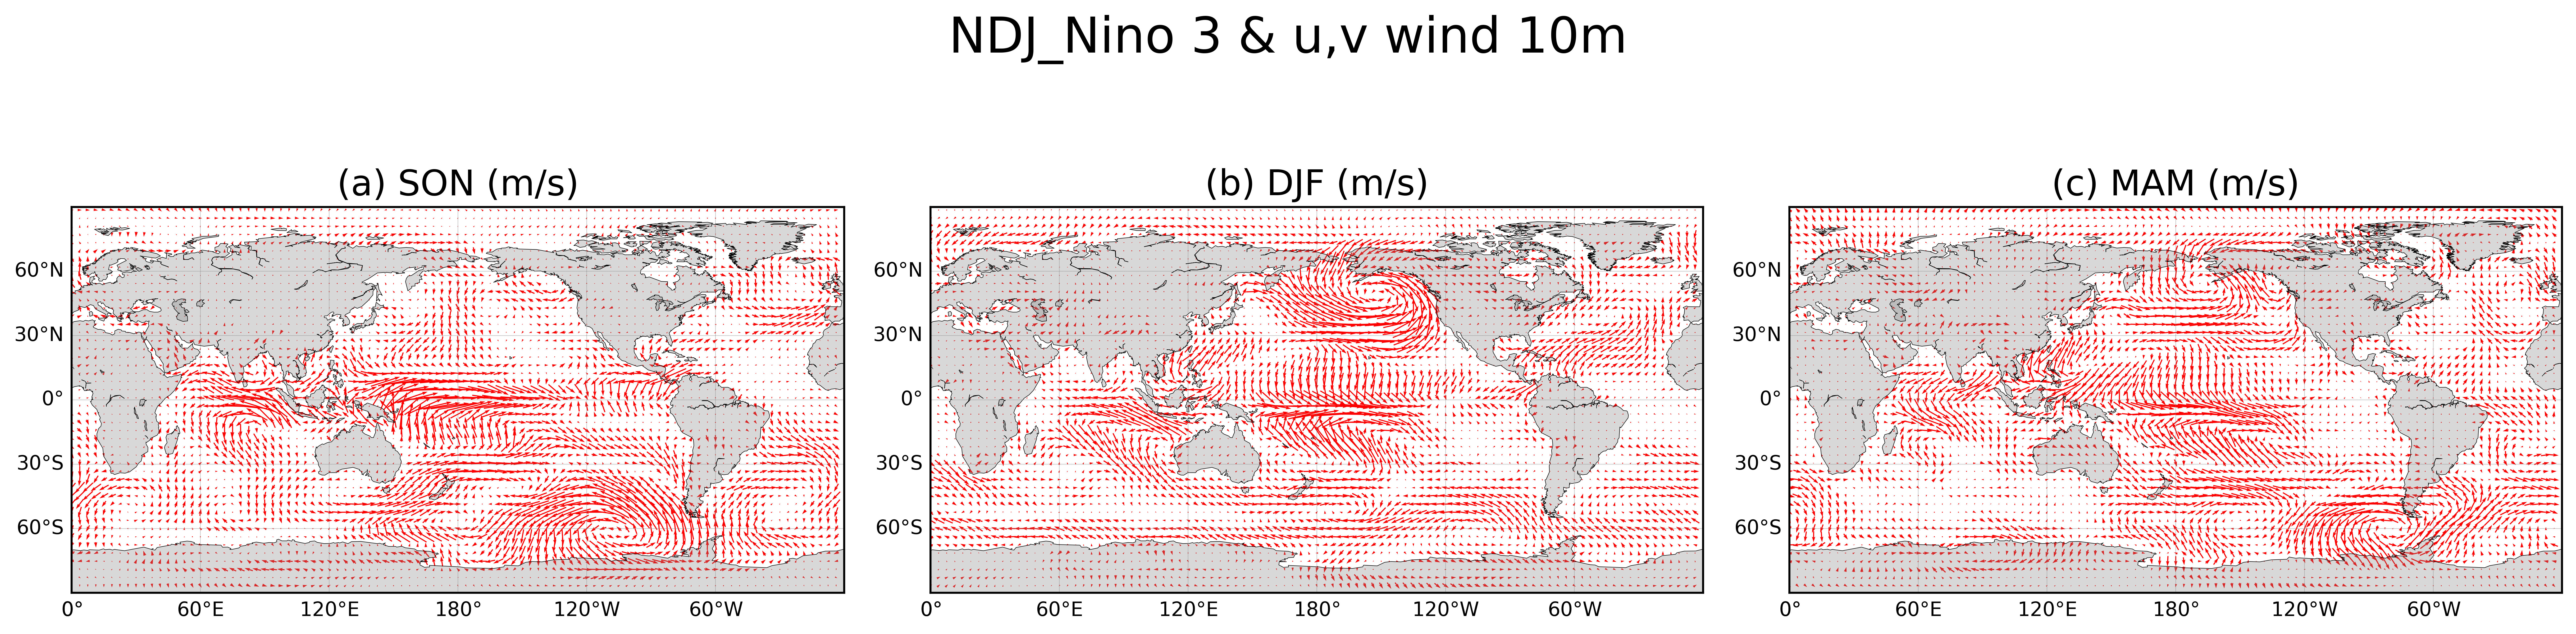

In [49]:
fig, axes = plt.subplots(1,3,figsize =(18,5),constrained_layout=True)
fig.suptitle("NDJ_Nino 3 & u,v wind 10m", fontsize = 25)
unit = ' (m/s)'

##########################################3
for k in range(0,3):
    m, x, y = basemap_cyl(uREG[k,::2,::2], axes[k], lat[::2], lon[::2])

    m.quiver(x,y,uREG[k,::2,::2],vREG[k,::2,::2],width=0.5, units='xy',angles='xy',pivot='middle',color='red')
    
    axes[k].set_title(title[k]+unit,fontsize=18)
    plt.grid(alpha=0.5)

## <Save Correaltion Map Figure to RESULT directory
dir_name   =  "C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\1_pics\\"
file_name  =  "(1-1) Nino3 & wind_10m reg.pdf"
path_name  =  dir_name+file_name
plt.savefig(path_name)


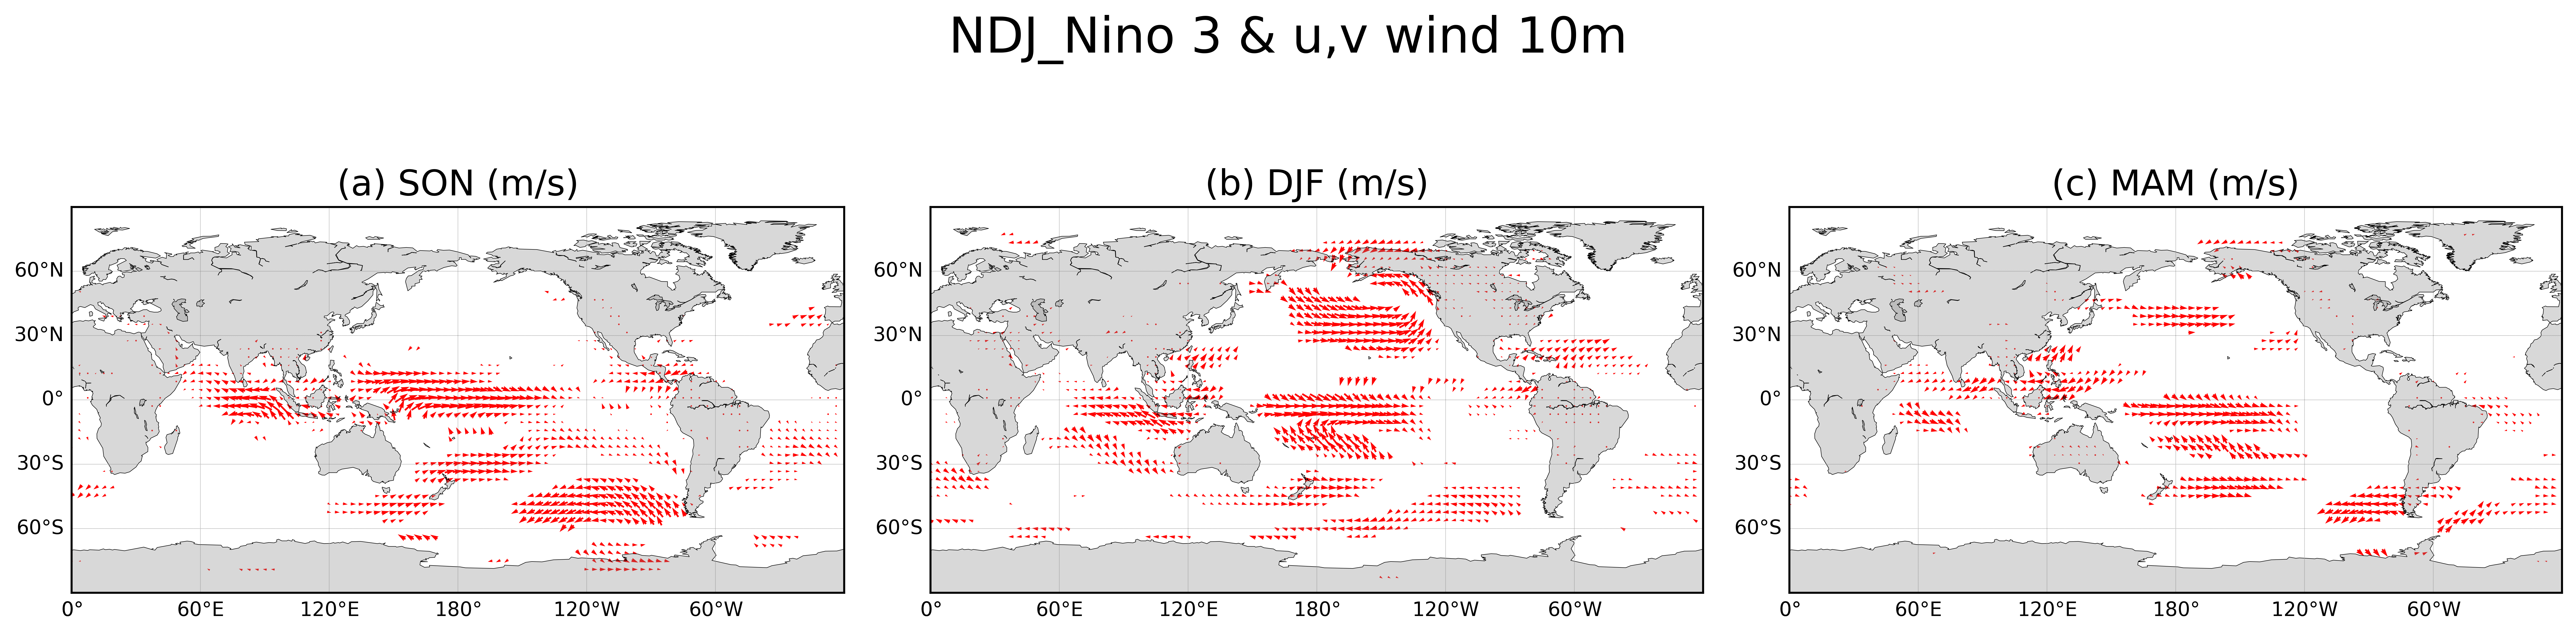

In [50]:
fig, axes = plt.subplots(1,3,figsize =(18,5),constrained_layout=True)
fig.suptitle("NDJ_Nino 3 & u,v wind 10m", fontsize = 25)
unit = ' (m/s)'
pval_sig_lev = 0.05

##########################################3
for k in range(0,3):
    m, x, y = basemap_cyl(uREG[k,::2,::2], axes[k], lat[::2], lon[::2])
    
    ## Plot significant regions by dots(SST)
    lat_signi = []; lon_signi = []
    for i in range(0,len(lat),2):
        for j in range(0,len(lon),2):
            if (uPVAL[k][i,j] > pval_sig_lev):
                uREG[k][i,j]=np.nan
                vREG[k][i,j]=np.nan
                
    vmin = -3.5 ; vmax = 3.5
    nv = 30 ; levels = np.linspace(vmin,vmax,nv+1)
    
    m.quiver(x,y,uREG[k,::2,::2],vREG[k,::2,::2],width =0.8,units='xy',angles='xy',pivot='middle',color='red')
    
    axes[k].set_title(title[k]+unit,fontsize=18)
    plt.grid(alpha=0.5)


## <Save Correaltion Map Figure to RESULT directory
dir_name   =  "C:\\Users\\judyg\\Desktop\\CSL\\vwind NCEP\\1_pics\\"
file_name  =  "(1-1) Nino3 & wind_10m reg_pval.pdf"
path_name  =  dir_name+file_name
plt.savefig(path_name)
